<a href="https://colab.research.google.com/github/dzakmu/MachineLearningC1/blob/main/Praktikum_5_Muhammad_Dzaky_24060122130064.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum 3

# Muhammad Dzaky Mu'ammar
# 24060122130064

In [20]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

## 1. Agglomerative clustering untuk Dataset Random

In [30]:
x1, y1 = make_blobs(n_samples=50, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9)

make_blobs adalah fungsi dari sklearn.datasets yang digunakan untuk menghasilkan dataset sintetik yang dapat digunakan untuk menguji algoritma klasifikasi atau klasterisasi. Fungsi ini menghasilkan data yang dibagi ke dalam beberapa klaster berdasarkan parameter yang diberikan.

In [32]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='single')
agglom.fit(x1, y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

Kode ini bertujuan untuk menggunakan klasterisasi hierarkis (Agglomerative Clustering) untuk membagi data x1 menjadi 4 klaster, menggunakan metode linkage 'single'. Tujuannya adalah untuk mengelompokkan data yang mirip ke dalam satu klaster berdasarkan kedekatannya.

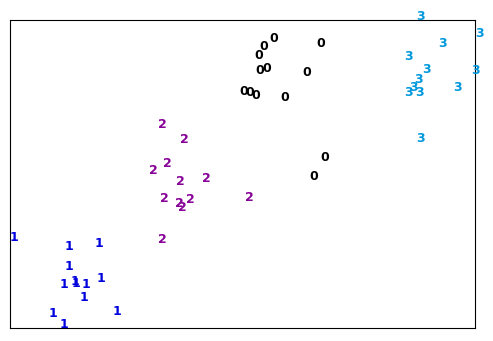

In [23]:
plt.figure(figsize=(6, 4))
x_min, x_max = np.min(x1, axis=0), np.max(x1, axis=0)
x1 = (x1 - x_min) / (x_max - x_min)

for i in range(x1.shape[0]):
    plt.text(x1[i, 0], x1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])
plt.show()

plt.scatter(x1[:, 0], x1[:, 1], marker='.')
plt.show()

* Plot pertama menampilkan titik data dengan label y1[i] (label target yang mungkin menunjukkan label asli atau kategori untuk setiap titik data), dan warnanya mencerminkan klaster yang ditentukan oleh AgglomerativeClustering.
* Plot kedua hanya menunjukkan titik data (dengan warna yang sesuai dengan label klaster), tanpa label atau teks di dalam plot.

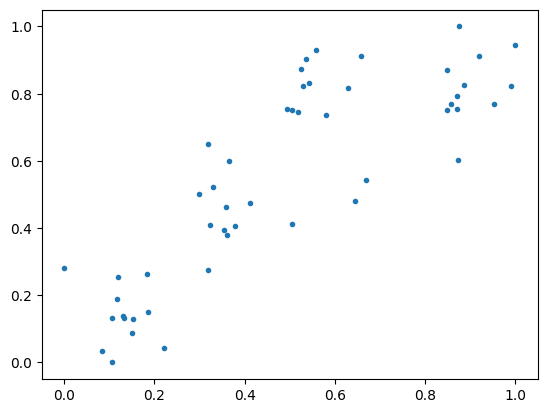

In [24]:
plt.scatter(x1[:, 0], x1[:, 1], marker='.')
plt.show()

kode ini akan menampilkan scatter plot yang menggambarkan titik-titik data berdasarkan dua fitur pertama dari dataset x1 (misalnya, fitur pertama pada sumbu X dan fitur kedua pada sumbu Y). Semua titik data akan digambarkan dengan marker titik (.) kecil, yang memungkinkan untuk melihat distribusi atau persebaran data dalam dua dimensi.

In [25]:
dist_matrix = distance_matrix(x1, x1)
print(dist_matrix)

[[0.         0.61531082 0.70887633 ... 0.66921838 0.36397633 0.09519954]
 [0.61531082 0.         0.10890846 ... 0.05607653 0.26456273 0.53237238]
 [0.70887633 0.10890846 0.         ... 0.08456179 0.34793896 0.63014769]
 ...
 [0.66921838 0.05607653 0.08456179 ... 0.         0.32058203 0.58494999]
 [0.36397633 0.26456273 0.34793896 ... 0.32058203 0.         0.29378965]
 [0.09519954 0.53237238 0.63014769 ... 0.58494999 0.29378965 0.        ]]


Kode ini berguna untuk menyusun matriks jarak antar titik dalam dataset. Matriks ini bisa digunakan dalam algoritma klasterisasi, seperti Agglomerative Clustering, di mana jarak antar titik digunakan untuk menentukan seberapa mirip dua titik dan untuk menggabungkan klaster-klaster berdasarkan kedekatan antar titik.
Matriks jarak adalah dasar dari banyak teknik unsupervised learning, termasuk klasterisasi hierarkis, yang mengandalkan pengukuran jarak untuk membentuk klaster berdasarkan kedekatan data.

<ipython-input-26-ffb6918aca60>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist_matrix, 'single')


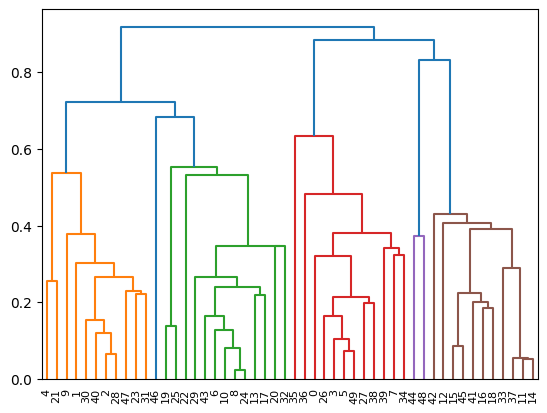

In [26]:
z = hierarchy.linkage(dist_matrix, 'single')
dendro = hierarchy.dendrogram(z)

Kode ini digunakan untuk membangun dan memvisualisasikan hasil klasterisasi hierarkis menggunakan metode single linkage.
Dengan menggunakan dendrogram, dapat dilihat bagaimana titik data digabung berdasarkan kedekatannya dan pada level kedekatan mana klaster-klaster tersebut digabungkan.

<ipython-input-27-9fbe797fd75e>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  y = hierarchy.linkage(dist_matrix, 'average')


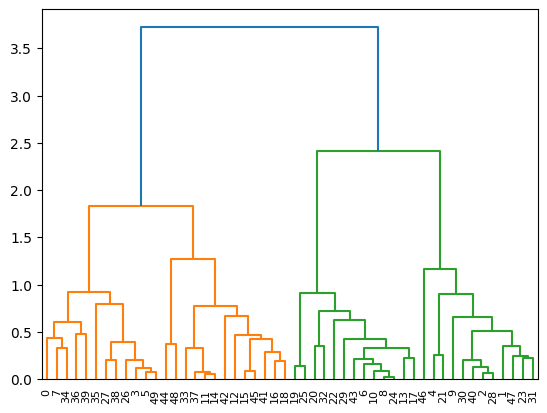

In [27]:
y = hierarchy.linkage(dist_matrix, 'average')
dendro2 = hierarchy.dendrogram(y)

sama seperti kode sebelumnya kode juga akan menghasilkan dendogram untuk hasil clustering menggunakan average linkage

## Perbedaan Single Linkage dan Average Linkage
1. Single Linkage

  Gambar Pertama menunjukkan hasil penerapan metode pengelompokan hierarki single linkage pada matriks jarak yang diberikan. Dalam single linkage, jarak antara dua kelompok didefinisikan sebagai jarak minimum antara setiap dua titik di dalam kelompok-kelompok tersebut. Hal ini cenderung menciptakan kelompok-kelompok yang memanjang dan 'berrantai'.

  Batang-batang vertikal dalam Gambar pertama  mewakili titik-titik data individual, dan tinggi setiap batang sesuai dengan jarak-jarak antara titik-titik tersebut. Batang-batang biru menunjukkan hierarki kelompok yang terbentuk menggunakan metode single linkage.

2. Average Linkage
  Gambar kedua  menunjukkan hasil penggunaan metode pengelompokan hierarki average linkage pada matriks jarak yang sama. Dalam average linkage, jarak antara dua kelompok didefinisikan sebagai rata-rata jarak antara semua pasangan titik di dalam dua kelompok tersebut. Ini umumnya menghasilkan kelompok-kelompok yang lebih kompak dan bersifat sferis dibandingkan dengan single linkage.

  Batang-batang vertikal dalam Gambar 2 juga mewakili titik-titik data individual, tetapi tingginya sekarang sesuai dengan rata-rata jarak antara titik-titik tersebut. Batang-batang biru menunjukkan hierarki kelompok yang terbentuk menggunakan metode average linkage.
  
Perbedaan utama antara kedua metode ini adalah bahwa single linkage lebih sensitif terhadap outlier dan dapat menciptakan kelompok-kelompok yang memanjang dan 'berrantai', sementara average linkage lebih kokoh terhadap outlier dan cenderung membentuk kelompok-kelompok yang lebih kompak dan bersifat sferis.

## 2. Agglomerative clustering menggunakan scipy dan sckit learn dengan single linkage dan average linkage

### a. Scipy learn

In [34]:
df = pd.read_csv('cars_clus.csv')
print(df.head(5))

  manufact    model   sales  resale type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919   16.36    0    21.5      1.8      140    101.2   
1    Acura       TL  39.384  19.875    0    28.4      3.2      225    108.1   
2    Acura       CL  14.114  18.225    0  $null$      3.2      225    106.9   
3    Acura       RL   8.588  29.725    0      42      3.5      210    114.6   
4     Audi       A4  20.397  22.255    0   23.99      1.8      150    102.6   

  width length curb_wgt fuel_cap mpg lnsales  partition  
0  67.3  172.4    2.639     13.2  28   2.828          0  
1  70.3  192.9    3.517     17.2  25   3.673          0  
2  70.6    192     3.47     17.2  26   2.647          0  
3  71.4  196.6     3.85       18  22    2.15          0  
4  68.2    178    2.998     16.4  27   3.015          0  


Kode diatas akan mengimpor data dari dataset car_slus

In [35]:
print("Shape of dataset before cleaning: ", df.size)
df[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
     'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
     'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

df = df.dropna()
df = df.reset_index(drop=True)
print("Shape of dataset after cleaning: ", df.size)
df.head(5)


Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


Kode diatas akan mengahapus semua data yang memilili nilai null

In [36]:
featureset = df[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

from sklearn.preprocessing import MinMaxScaler
x = featureset.values # returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]


array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Inti dari proses ini adalah untuk mengubah data fitur yang memiliki rentang nilai yang berbeda (misalnya, horsepow dan mpg yang mungkin memiliki nilai yang sangat berbeda) menjadi skala yang lebih konsisten (antara 0 dan 1), yang penting dalam proses training model machine learning, sehingga model bisa bekerja lebih efisien.

In [38]:
import scipy
import numpy as np # Import numpy for zeros function

leng = feature_mtx.shape[0]
D = np.zeros([leng, leng]) # Use np.zeros to create a zero matrix
for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

Kode ini menghitung matriks jarak pairwise antar semua data points di feature_mtx menggunakan jarak Euclidean. Matriks D yang dihasilkan akan berukuran leng x leng (dimana leng adalah jumlah data), dan setiap elemen D[i, j] berisi jarak Euclidean antara titik data ke-i dan titik data ke-j.

In [39]:
import pylab
import scipy.cluster.hierarchy
import scipy.cluster.hierarchy
Z_average = hierarchy.linkage(D, 'average')
Z_single = hierarchy.linkage(D, 'single')


<ipython-input-39-db54af652ca9>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_average = hierarchy.linkage(D, 'average')
<ipython-input-39-db54af652ca9>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = hierarchy.linkage(D, 'single')


Kode ini menghitung klastering hierarkis menggunakan dua metode penggabungan yang berbeda: average linkage dan single linkage.

In [40]:
from scipy.cluster.hierarchy import fcluster
max_d = 3  # batas jarak
clusters_single = fcluster(Z_single, max_d, criterion='distance')
clusters_single


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

Kode ini bertujuan untuk memotong dendrogram yang dihasilkan oleh klastering hierarkis dengan menggunakan ambang batas jarak (max_d). Hasilnya adalah pengelompokan data ke dalam klaster-klaster berdasarkan kedekatan antar data points yang diukur menggunakan jarak Euclidean (atau jarak lain yang digunakan saat menghitung matriks D).

In [41]:
from scipy.cluster.hierarchy import fcluster
max_d = 3  # batas jarak
clusters_average = fcluster(Z_average, max_d, criterion='distance')
clusters_average


array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

Tujuan dari kode ini adalah untuk memotong dendrogram yang dihasilkan oleh klastering hierarkis menggunakan metode average linkage pada jarak max_d. Hasilnya adalah klaster-klaster yang terdiri dari data yang lebih dekat satu sama lain (berdasarkan jarak Euclidean yang dihitung sebelumnya).

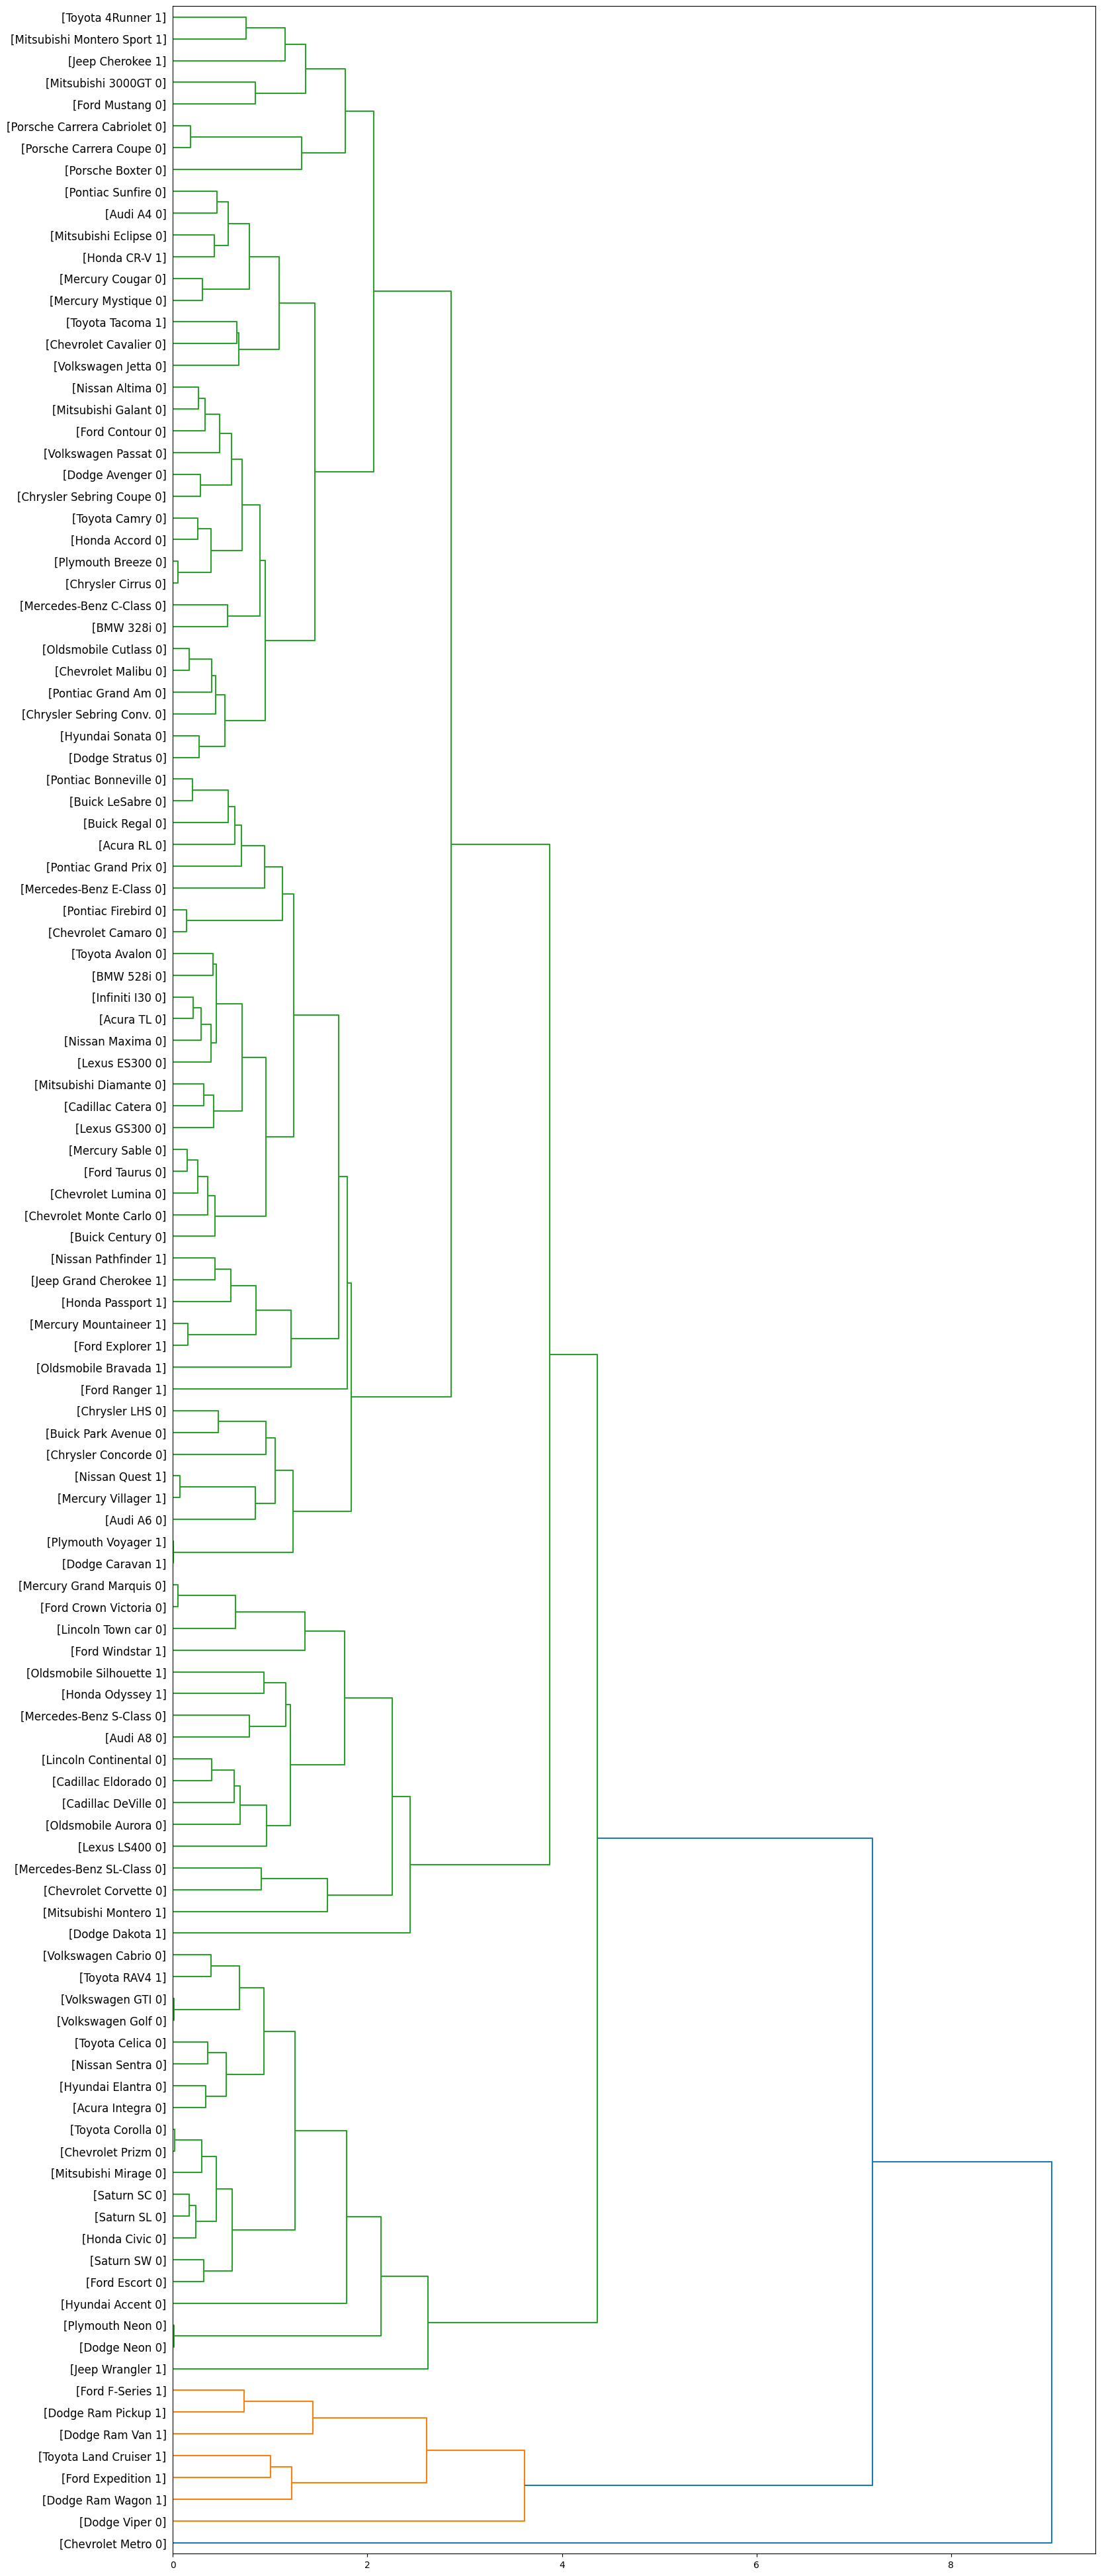

In [43]:
fig = pylab.figure(figsize=(18, 50))
def llf (id):
  return '[%s %s %s]' %(df['manufact'][id], df['model'][id], int(float(df['type'][id])))

dendro = hierarchy.dendrogram(Z_average, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')

Setelah kode ini dijalankan, dendrogram akan menampilkan struktur hierarkis data yang dikelompokkan menggunakan average linkage. Cabang-cabang dendrogram akan menggambarkan penggabungan klaster-klaster berdasarkan jarak antar titik, dan setiap daun akan menampilkan informasi yang relevan seperti nama pabrikan, model, dan tipe.

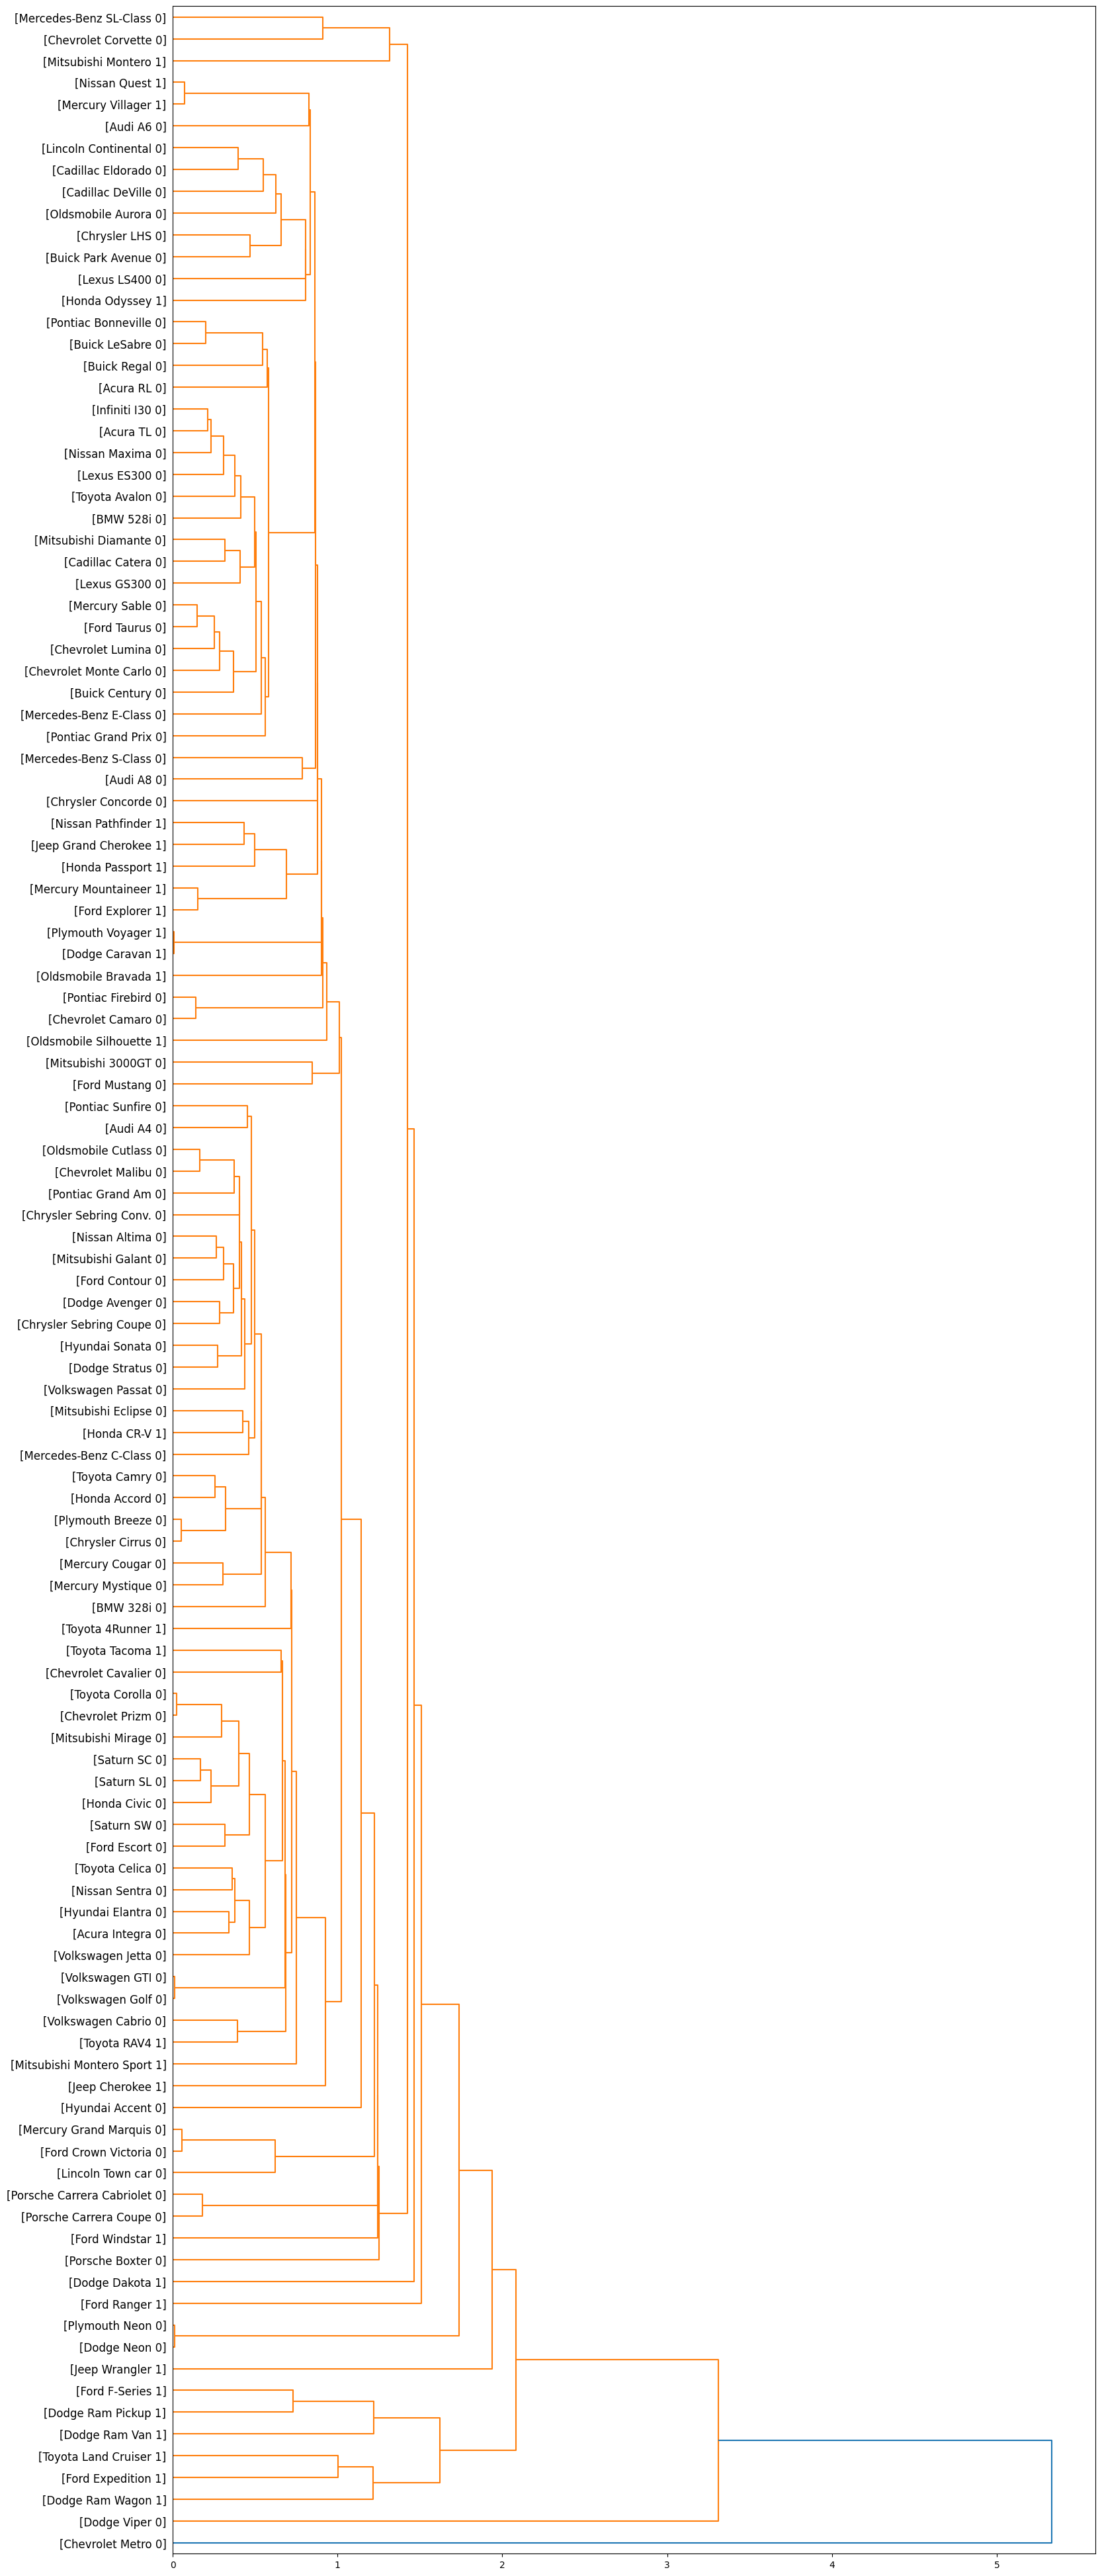

In [44]:
fig = pylab.figure(figsize=(18, 50))
def llf (id):
  return '[%s %s %s]' %(df['manufact'][id], df['model'][id], int(float(df['type'][id])))

dendro = hierarchy.dendrogram(Z_single, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')

Kode ini digunakan untuk membuat visualisasi dendrogram berdasarkan hasil klastering dengan single linkage. Dendrogram ini akan menggambarkan bagaimana klaster-klaster terbentuk pada setiap tahap klastering, dengan informasi tambahan berupa label daun yang menunjukkan pabrikan, model, dan tipe mobil.

### b. Scikit Learn

In [45]:
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [103]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='single')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Kode ini bertujuan untuk melakukan klastering aglomeratif pada dataset feature_mtx menggunakan algoritma AgglomerativeClustering dari scikit-learn.

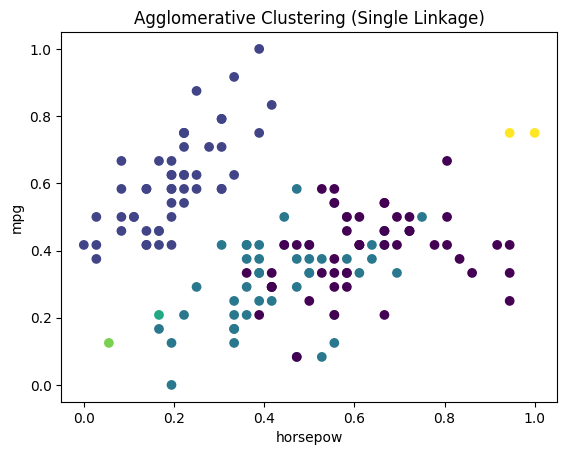

In [99]:
plt.scatter(feature_mtx[:, 0], feature_mtx[:, 1], c=agglom.labels_, cmap='viridis')
plt.title('Agglomerative Clustering (Single Linkage)')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.show()

* Agglomerative Clustering dengan single linkage menghasilkan 6 klaster berdasarkan jarak minimum antar titik data. Setiap titik diberi label klaster yang sesuai, dan hasil klastering ini tergantung pada cara single linkage menggabungkan titik-titik terdekat.
* Hasil klastering ini akan menunjukkan pembagian data ke dalam klaster-klaster yang terhubung erat, namun bisa saja terdapat klaster dengan struktur yang kurang jelas atau "memanjang" karena metode single linkage.

In [100]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='average')
agglom.fit(feature_mtx)
agglom.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

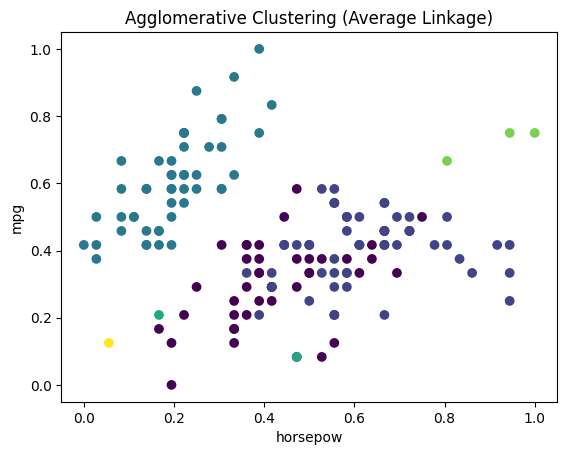

In [101]:
# Visualisasi hasil klastering (average linkage)
plt.scatter(feature_mtx[:, 0], feature_mtx[:, 1], c=agglom.labels_, cmap='viridis')
plt.title('Agglomerative Clustering (Average Linkage)')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.show()


Kode ini menghasilkan klastering menggunakan Agglomerative Clustering dengan average linkage, yang mengelompokkan data feature_mtx menjadi 6 klaster. Hasil klastering divisualisasikan dalam scatter plot, di mana titik-titik data yang termasuk dalam klaster yang sama diberi warna yang sama. Klaster-klaster ini cenderung lebih terpisah dan lebih terstruktur berkat penggunaan average linkage.

Perbedaan Utama:
* SciPy:
Klastering hierarkis di SciPy bekerja dengan menghitung matriks jarak antar titik data terlebih dahulu (misalnya menggunakan jarak Euclidean), kemudian menggabungkan titik-titik tersebut secara iteratif berdasarkan jarak antara mereka.
Dendrogram dihasilkan sebagai visualisasi dari proses penggabungan klaster.
* scikit-learn:
Jika menggunakan AgglomerativeClustering dari scikit-learn,  tidak akan  mendapatkan dendrogram secara langsung, meskipun algoritma ini melakukan proses yang mirip dengan klastering hierarkis.
scikit-learn AgglomerativeClustering hanya mengembalikan label klaster, tidak ada visualisasi dendrogram secara otomatis (meskipun kamu bisa menggunakannya untuk menghasilkan dendrogram dengan scipy.cluster.hierarchy.linkage).

## 3. Agglomerative Clustering mengguanakn Scipy dan Sckit Learn dengan Single, Average dan Complete Linkage Pada Dataset Iris

### a. Scipy Learn

In [71]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns

iris = load_iris()
pdf = pd.DataFrame(iris.data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width']) # Convert to DataFrame with column names
# Add the target variable as 'class'
pdf['class'] = iris.target
featureset = pdf[['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']]

from sklearn.preprocessing import MinMaxScaler
x = featureset.values # returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]


array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

* Kode ini memuat dataset Iris, menyiapkan fitur untuk klastering, dan melakukan skala Min-Max pada fitur-fitur tersebut untuk memastikan semua fitur berada dalam rentang yang sama (0 hingga 1).
* MinMaxScaler digunakan untuk meminimalkan perbedaan skala antar fitur, yang sangat penting dalam klastering untuk mencegah fitur dengan rentang yang lebih besar mendominasi algoritma klastering.

In [73]:
import scipy
import numpy as np # Import numpy for zeros function

leng = feature_mtx.shape[0]
Z = np.zeros([leng, leng]) # Use np.zeros to create a zero matrix
for i in range(leng):
    for j in range(leng):
        Z[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [72]:
import pylab
import scipy.cluster.hierarchy
import scipy.cluster.hierarchy
Z_avg = hierarchy.linkage(Z, 'average')
Z_sgl = hierarchy.linkage(Z, 'single')

<ipython-input-72-584f4fcc56af>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_avg = hierarchy.linkage(Z, 'average')
<ipython-input-72-584f4fcc56af>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_sgl = hierarchy.linkage(Z, 'single')


In [74]:
from scipy.cluster.hierarchy import fcluster
max_d = 3  # batas jarak
clusters_single = fcluster(Z_single, max_d, criterion='distance')
clusters_single

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [75]:
from scipy.cluster.hierarchy import fcluster
max_d = 3  # batas jarak
clusters_average = fcluster(Z_average, max_d, criterion='distance')
clusters_average

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

<ipython-input-80-f06e8f815bf5>:20: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z_single = hierarchy.linkage(dist_matrix, method='single')
<ipython-input-80-f06e8f815bf5>:22: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z_average = hierarchy.linkage(dist_matrix, method='average')
<ipython-input-80-f06e8f815bf5>:24: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z_complete = hierarchy.linkage(dist_matrix, method='complete')


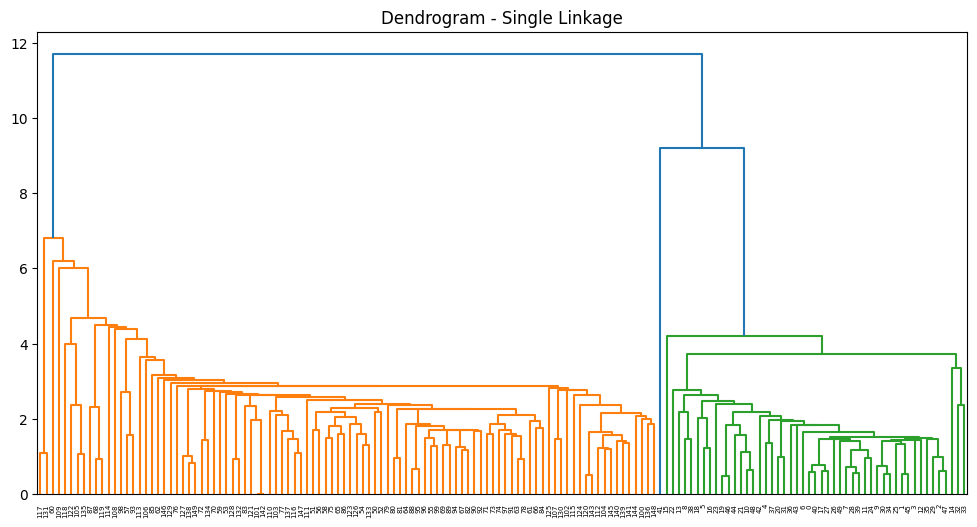

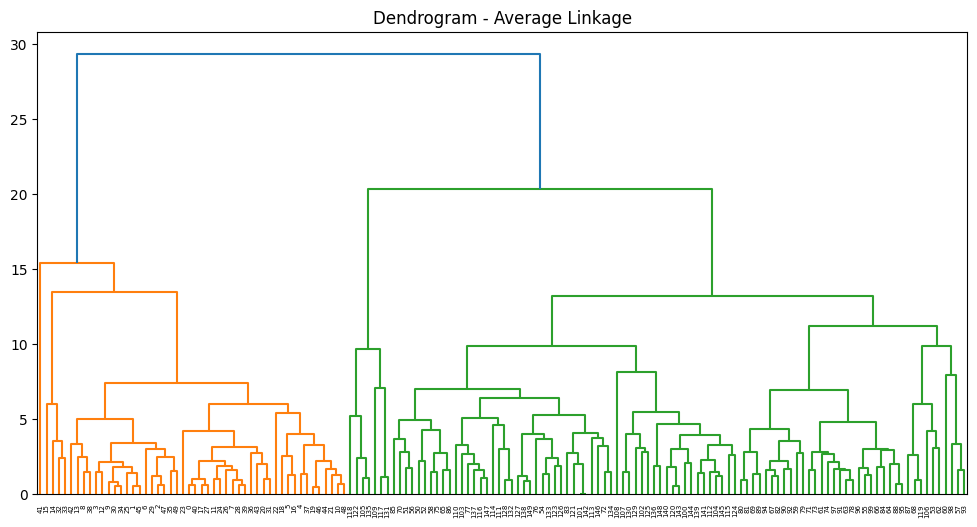

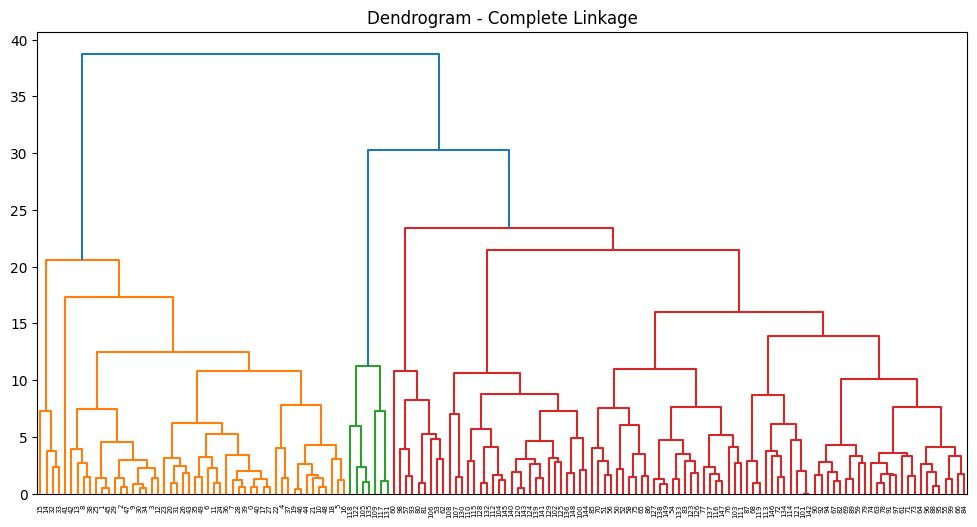

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy



iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dist_matrix = distance_matrix(X_scaled, X_scaled)

z_single = hierarchy.linkage(dist_matrix, method='single')

z_average = hierarchy.linkage(dist_matrix, method='average')

z_complete = hierarchy.linkage(dist_matrix, method='complete')

plt.figure(figsize=(12, 6))
plt.title('Dendrogram - Single Linkage')
hierarchy.dendrogram(z_single)
plt.show()

plt.figure(figsize=(12, 6))
plt.title('Dendrogram - Average Linkage')
hierarchy.dendrogram(z_average)
plt.show()

plt.figure(figsize=(12, 6))
plt.title('Dendrogram - Complete Linkage')
hierarchy.dendrogram(z_complete)
plt.show()



Kode diatas akan melakukan klastering hierarkis aglomeratif pada dataset Iris menggunakan berbagai metode linkage (single, average, dan complete). Kode ini juga menggunakan dendrogram untuk visualisasi hasil klastering dengan masing-masing metode.

1. Single Linkage: Dendrogram ini menunjukkan klaster-klaster yang digabungkan berdasarkan jarak minimum antar titik di klaster yang berbeda. Biasanya menghasilkan struktur klaster yang lebih memanjang (rantai) dan menggabungkan klaster-klaster yang tidak terlalu homogen.
2. Average Linkage: Dendrogram ini menunjukkan klaster-klaster yang digabungkan berdasarkan jarak rata-rata antar titik di dua klaster. Biasanya menghasilkan klaster yang lebih seimbang dan terpisah lebih jelas dibandingkan single linkage.
3. Complete Linkage: Dendrogram ini menunjukkan klaster-klaster yang digabungkan berdasarkan jarak maksimum antar titik di klaster yang berbeda. Klaster-klaster ini cenderung lebih terpisah dan lebih konsisten dibandingkan dengan single linkage dan average linkage.

### b. Sckit Learn

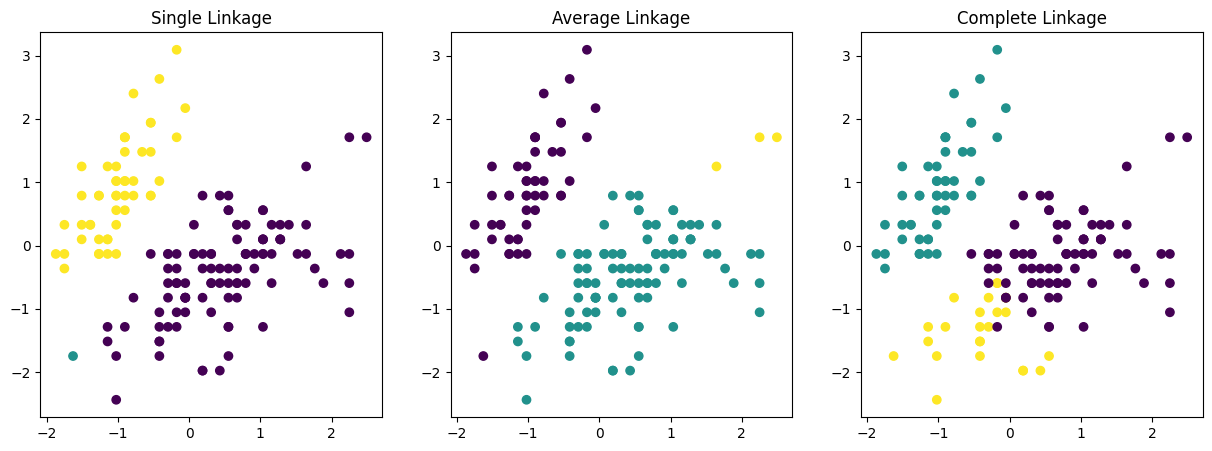

In [81]:
# Menggunakan AgglomerativeClustering dari Scikit-learn dengan linkage yang berbeda
agglom_single = AgglomerativeClustering(n_clusters=3, linkage='single')
agglom_single.fit(X_scaled)

agglom_average = AgglomerativeClustering(n_clusters=3, linkage='average')
agglom_average.fit(X_scaled)

agglom_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
agglom_complete.fit(X_scaled)

# Visualisasi hasil klasterisasi
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot Single Linkage
ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglom_single.labels_, cmap='viridis')
ax[0].set_title('Single Linkage')

# Plot Average Linkage
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglom_average.labels_, cmap='viridis')
ax[1].set_title('Average Linkage')

# Plot Complete Linkage
ax[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglom_complete.labels_, cmap='viridis')
ax[2].set_title('Complete Linkage')

plt.show()


Kode diatas menggunakan AgglomerativeClustering dari scikit-learn dengan tiga metode linkage yang berbeda untuk mengklaster dataset Iris yang sudah diskalakan. Kemudian, hasil klasterisasi divisualisasikan dalam tiga plot berbeda.

1. Single Linkage:
Biasanya menghasilkan klaster-klaster yang terhubung secara berantai, dengan beberapa klaster yang mungkin terlihat memanjang dan terhubung karena menggunakan jarak minimum antar titik.
2. Average Linkage:
Klaster-klaster cenderung lebih seimbang dan terpisah lebih jelas dibandingkan dengan single linkage, karena rata-rata jarak digunakan untuk menggabungkan klaster.
3. Complete Linkage:
Klaster-klaster cenderung terpisah lebih jelas dan lebih stabil, karena menggunakan jarak maksimum antar titik di dua klaster untuk menggabungkannya. Klaster yang lebih terpisah akan lebih jelas terlihat.

Tiga metode linkage yang berbeda menghasilkan bentuk klaster yang berbeda. Klaster-klaster yang dihasilkan dengan single linkage cenderung lebih saling terhubung, sementara average linkage dan complete linkage menghasilkan klaster yang lebih terpisah dan seimbang.
Visualisasi scatter plot membantu memahami bagaimana data dikelompokkan berdasarkan ketiga metode linkage tersebut, dan memberikan gambaran tentang sejauh mana masing-masing metode mempengaruhi pemisahan klaster.